# Boom Bikes Business Analysis
                                           



## Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

 

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1)Which variables are significant in predicting the demand for shared bikes.
    2)How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## The steps to be followed in this exercise are as follows:

### Step 1: Reading and Understanding the Data
### Step 2: Visualising the Data
### Step 3: Data Preparation
### Step 4: Splitting the Data into Training and Testing Sets
### Step 5: Building a linear model
### Step 6: Residual Analysis of the train data
### Step 7: Making Predictions Using the Final Model
### Step 8: Model Evaluation
### Step 9: R^2 on test data 

## Step1: Reading and Understanding data
    1. Importing the required libraries
    2. Understanding the structure of the data

In [3]:
import pandas as pd # For data manipulation and to create charts
import numpy as np # For data manipulation
import matplotlib.pyplot as plt # To create charts for data visualization
import seaborn as sns  # To create charts for data visualization
import datetime as dt # To handle complex functionalities involving the date and time
import itertools

In [4]:
#This Setting will ignore all warnings
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
#This setting would allow you to see all columns available in your dataframe or all rows in a series output
pd.set_option('display.max_columns', None) # Set the display option to show all columns
pd.set_option('display.max_rows', None) # Set the display option to show all rows
pd.set_option('display.max_colwidth', None) # Set the maximum column width to show all the column information

In [6]:
#Reading the boom_bike csv file
boom_bike = pd.read_csv(r'C:\Users\Vishnu\python\day.csv')

In [7]:
# Check the head of the dataset
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [96]:
#Checking the shape
boom_bike.shape

(730, 16)

In [97]:
# Check the info of the variable in the dataset
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [98]:
# Checking the null value if any
boom_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping variable
  1. casual
  2. registered
   As per data dictionary variable 'cnt' which is our target variable is derived from the above two variables. So we can drop      these two variables
  3. workingday
   Similarly based on data dictionary we can drop working day as it is derived from variable holiday and weekday
  4. instant
   we can drop as it is a Id variable which recognise all row uniquely
  5. dteday
   All the infformation of dteday are already derived and present in data for ex: mnth, yr etc 

In [8]:
boom_bike.drop('casual',axis=1, inplace = True)
boom_bike.drop('registered',axis=1, inplace = True)
boom_bike.drop('workingday',axis=1, inplace = True)
boom_bike.drop('dteday',axis=1, inplace = True)
boom_bike.drop('instant',axis=1, inplace = True)

In [9]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600


In [101]:
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Step 2: Visualising the Data

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where i am trying to identify if some predictors directly have a strong association with the outcome variable
Lets visualise our data using matplotlib and seaborn.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2000x1500 with 0 Axes>

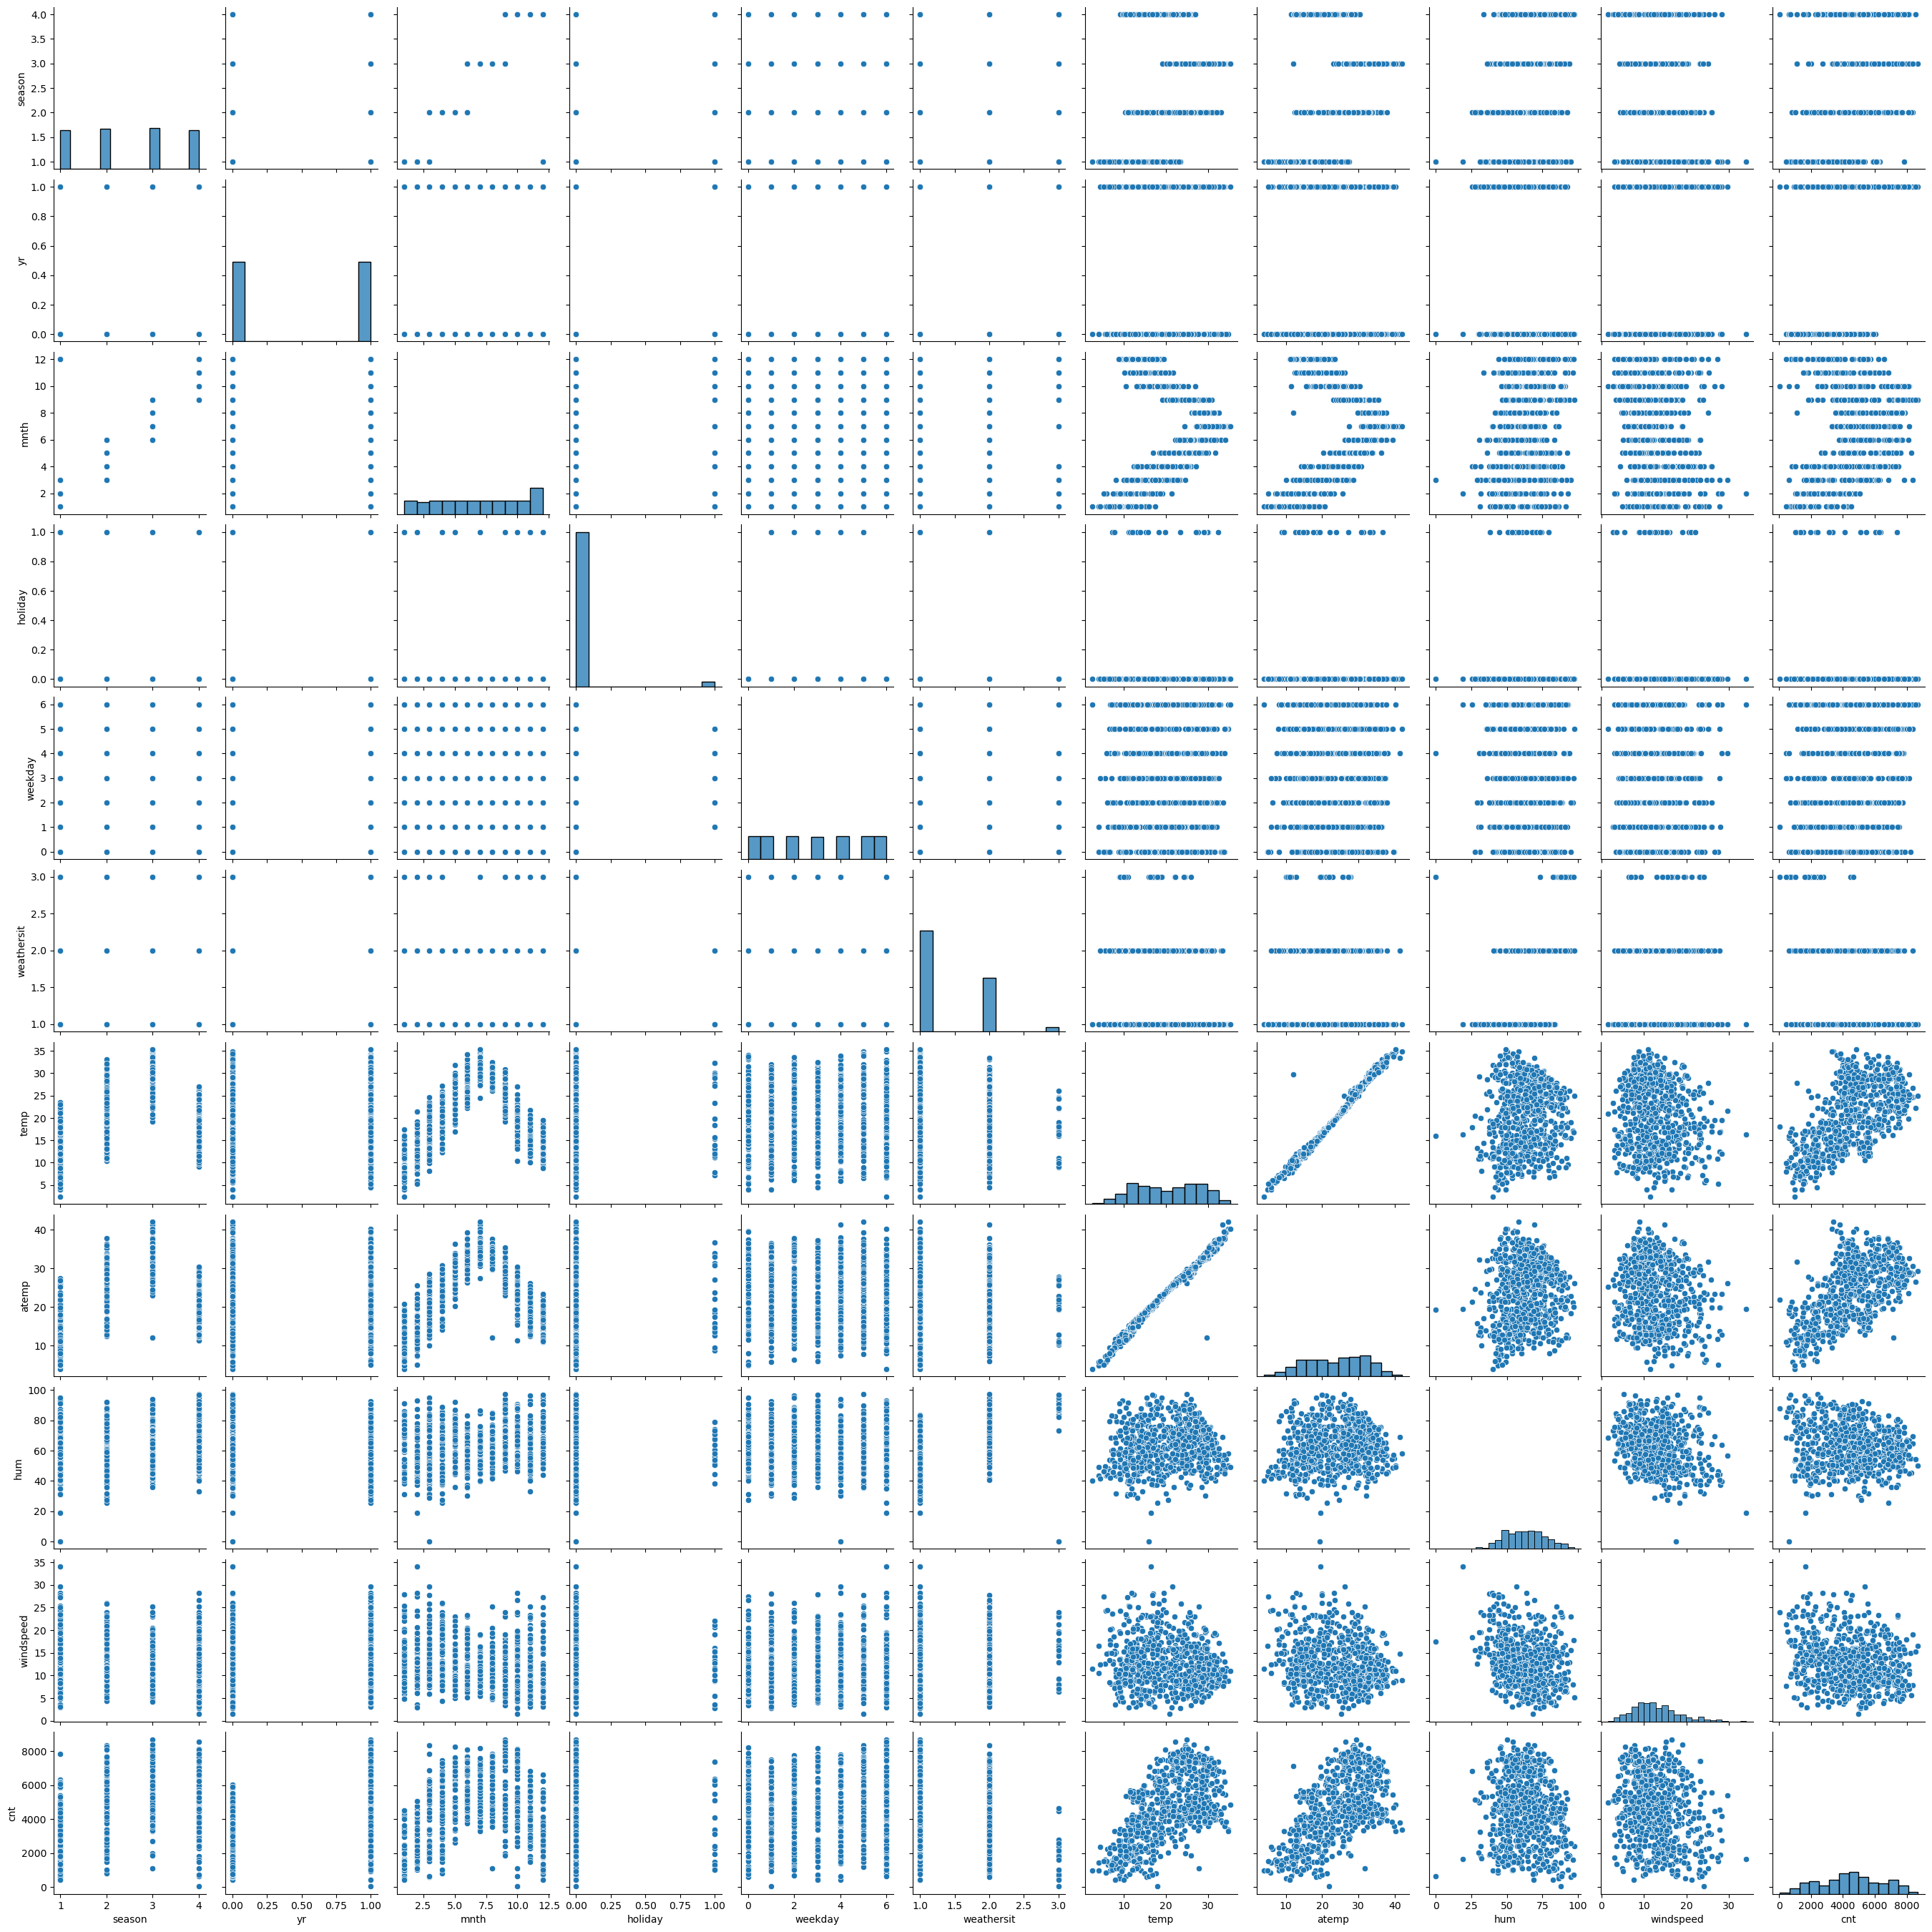

In [86]:
# Taking All numeric variable
plt.figure(figsize = (20, 15))
sns.pairplot(boom_bike)
plt.show()

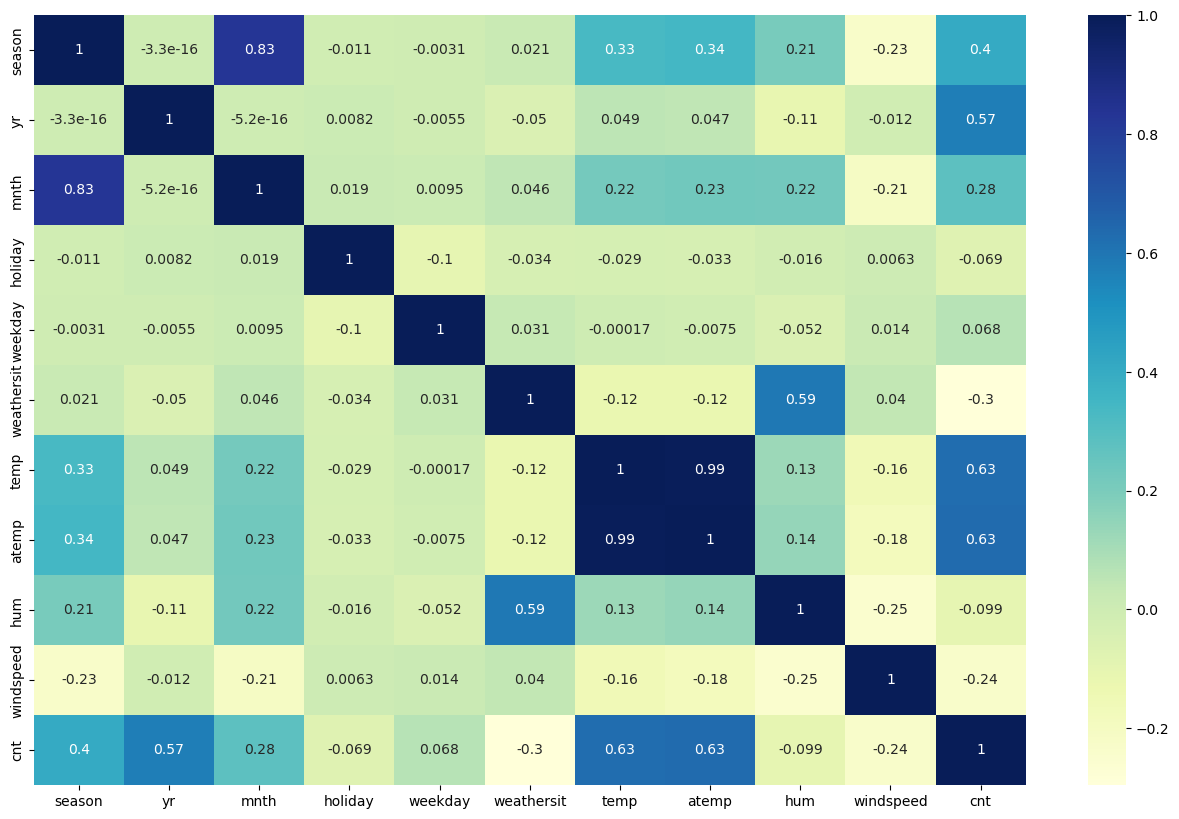

In [89]:
plt.figure(figsize = (16, 10))
sns.heatmap(boom_bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

Temp and Atemp are highly correlated(correlation coefficient = .99). However, i am not dropping it as if it is not a useful variable for model will be dropped by RFE or by VIF or by Pvalue. Also for other varible i am not interested ib checking the corr as we may not drop a useful variable for the model

In [11]:
# Mapping variables with appropriate values in variables season, mnth, weathersit, weekday

boom_bike['season']=boom_bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bike['mnth']=boom_bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bike['weathersit']=boom_bike.weathersit.map({1: 'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Snow_Fog'})
boom_bike['weekday']=boom_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [104]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,Clear,9.305237,11.46350,43.6957,12.522300,1600


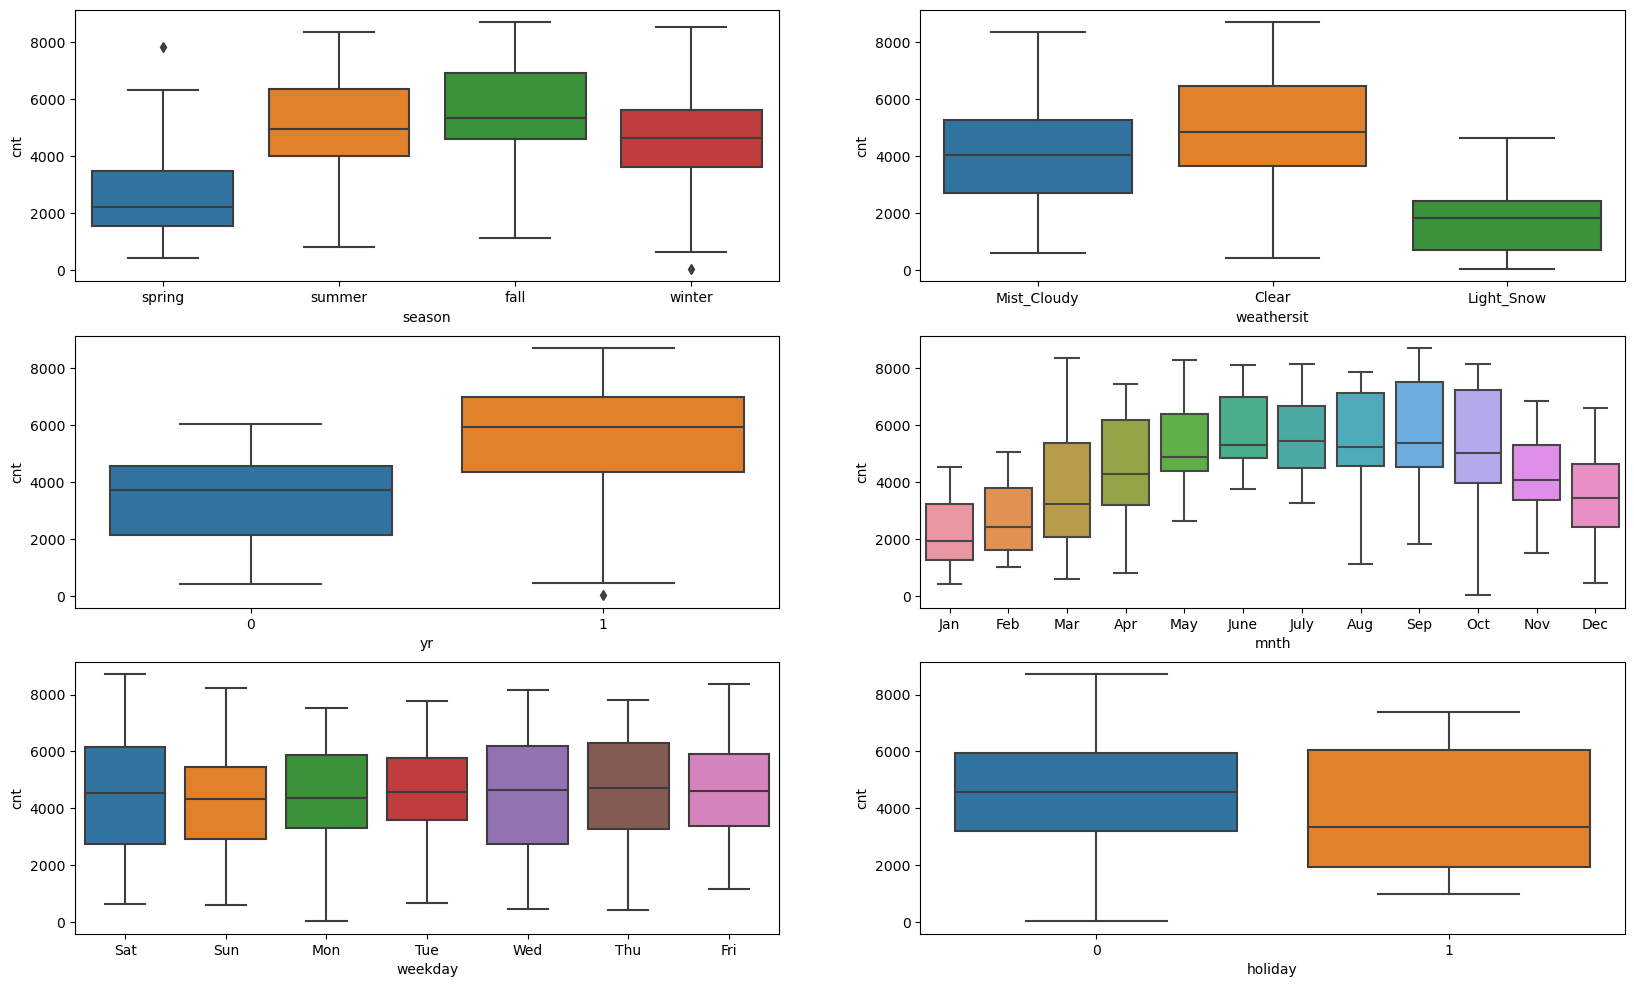

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bike)
plt.show()


Season: During Spring boom bike has the lowest business where as during fall season it has got strong trend wrt to target variable.
 
Year:2019 is showing strong wrt to the target variable

Weathersit: During clear weather boom bike has highest business

Weekday: All weekday (from saturday till friday) has almost same trend wrt target variable 'cnt'

Holiday: Boom bike has more business during working day.

## Dummy Variable creation

We have used one-hot encoding for creation of dummy variables. They are created to cover all the values of a categorical variable. Dummy variable acquire value 1 which denotes presence and 0 for absence of the particular value of the categorical variable. This means if the category variable has 3 categories, there will be 3 dummy variables. 
The drop_first = True is used while creating dummy variables to drop the reference category. The reason for this is to avoid the multi-collinearity getting added into the model if all dummy variables are included. The reference category can be easily deduced where 0 is present in all the columns of a single row for all the other dummy variables of a particular category.


In [12]:
season_cat = pd.get_dummies(boom_bike['season'], drop_first = True)

In [13]:
# Add the results to the original boom_bike dataframe
boom_bike = pd.concat([boom_bike, season_cat], axis = 1)

In [145]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sat,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [14]:
weather_cat = pd.get_dummies(boom_bike['weathersit'],drop_first = True)

In [15]:
boom_bike = pd.concat([boom_bike, weather_cat], axis = 1)

In [16]:
mnth_cat = pd.get_dummies(boom_bike['mnth'],drop_first = True)

In [17]:
boom_bike = pd.concat([boom_bike, mnth_cat],axis = 1)

In [18]:
wkday_cat = pd.get_dummies(boom_bike['weekday'],drop_first = True)

In [19]:
boom_bike = pd.concat([boom_bike, wkday_cat],axis = 1)

In [20]:
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter',
       'Light_Snow', 'Mist_Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [21]:
boom_bike.drop(['season','mnth','weekday','weathersit'], axis = 1 , inplace = True)

In [22]:
boom_bike.shape

(730, 29)

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist_Cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Light_Snow', 'Mist_Cloudy', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [27]:
# Apply standardization() to all the columns except the 'yes-no' and 'dummy' variables
# Inorder to solve the problem of interpretation, paricularly the coffecient or estimates should be comparable  
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [28]:
scaler = StandardScaler()

In [29]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow,Mist_Cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,1.231731,1.194106,0.516433,-0.330615,1.399629,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


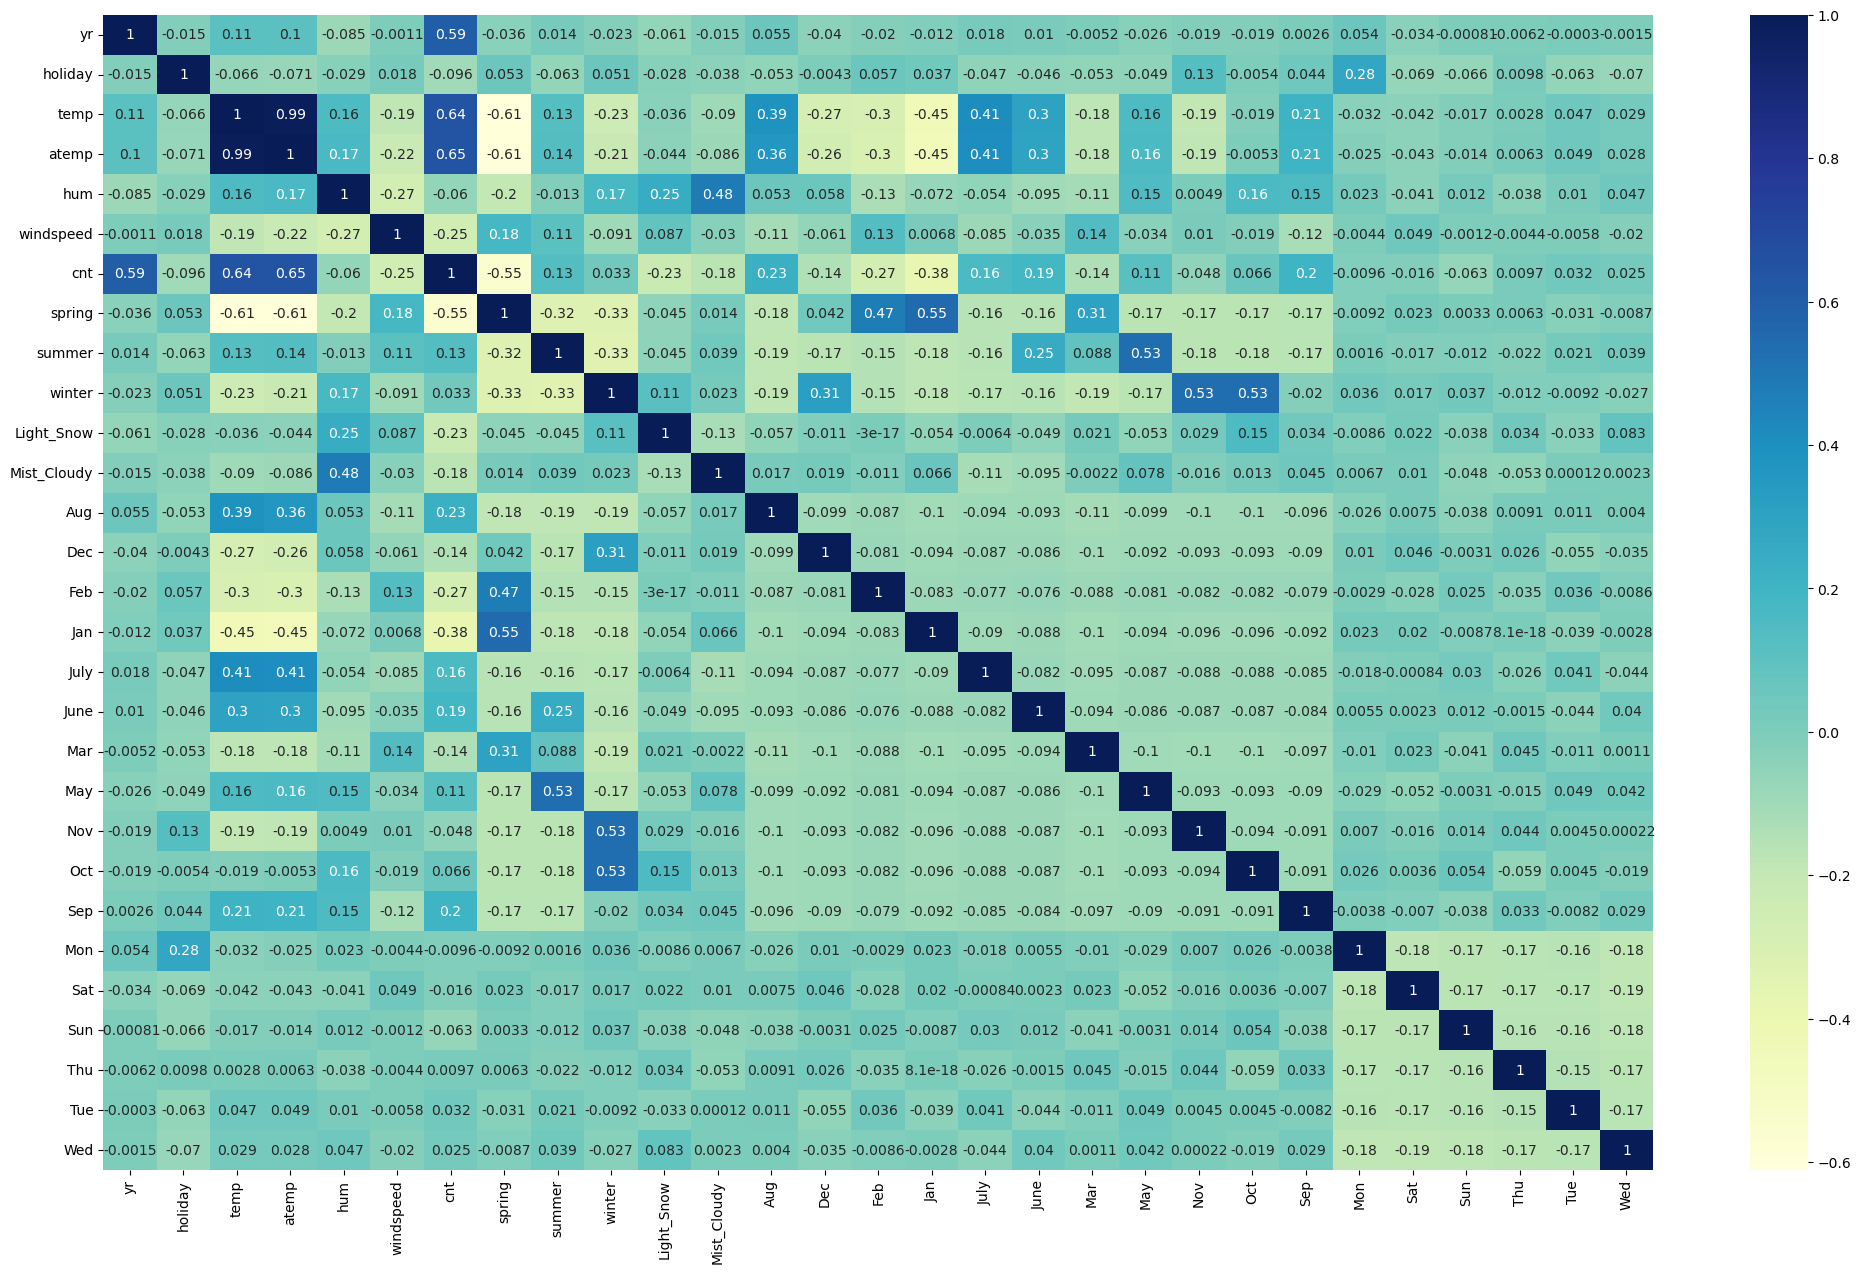

In [31]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Temp and Atemp are highly correlated(correlation coefficient = .99). However, i am not dropping it
as if it is not a useful variable for model will be dropped by RFE or by VIF or by Pvalue. 
Also for other varible i am not interested ib checking the corr as we may not drop a useful variable for the model

## Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE
Recursive feature elimination

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', False, 4),
 ('windspeed', False, 2),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 14),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 7),
 ('Wed', False, 11)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Light_Snow',
       'Mist_Cloudy', 'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sep', 'Sun'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.58e-181
Time:                        23:01:28   Log-Likelihood:                -266.29
No. Observations:                 510   AIC:                             564.6
Df Residuals:                     494   BIC:                             632.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3116      0.069     -4.487      

In [41]:
# As p value of "Feb is max"
X_train_new = X_train_rfe.drop(["Feb"], axis = 1)

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          5.17e-182
Time:                        23:07:51   Log-Likelihood:                -267.33
No. Observations:                 510   AIC:                             564.7
Df Residuals:                     495   BIC:                             628.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3267      0.069     -4.757      

In [47]:
# As p value of "Feb is max"
X_train_new = X_train_new.drop(["summer"], axis = 1)

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [50]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.37e-182
Time:                        23:14:11   Log-Likelihood:                -268.69
No. Observations:                 510   AIC:                             565.4
Df Residuals:                     496   BIC:                             624.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2394      0.043     -5.573      

In [52]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.45
3,temp,3.19
4,spring,2.74
5,winter,2.27
11,Nov,1.70
9,Jan,1.59
8,Dec,1.42
10,July,1.30
12,Sep,1.11
6,Light_Snow,1.05


### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [54]:
y_train_cnt = lm.predict(X_train_lm)

In [55]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Residual')

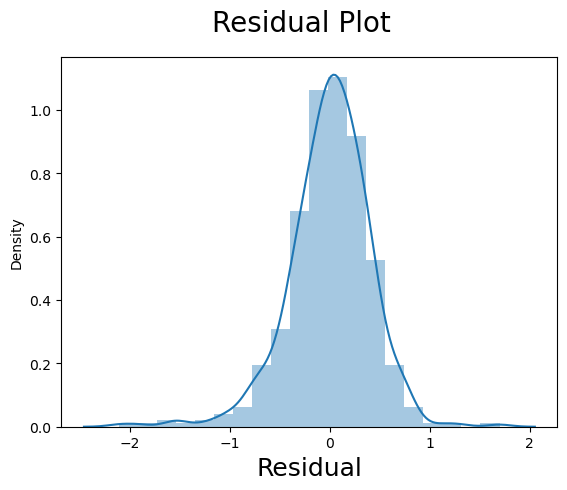

In [238]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residual Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual', fontsize = 18)                         # X-label

Making Predictions
Applying the Standardization on the test sets

## Making Predictions

#### Applying the scaling on the test sets

In [56]:
# Apply standardization() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
y_pred=lm.predict(X_test_new)

Model Evaluation

Text(0, 0.5, 'y_pred')

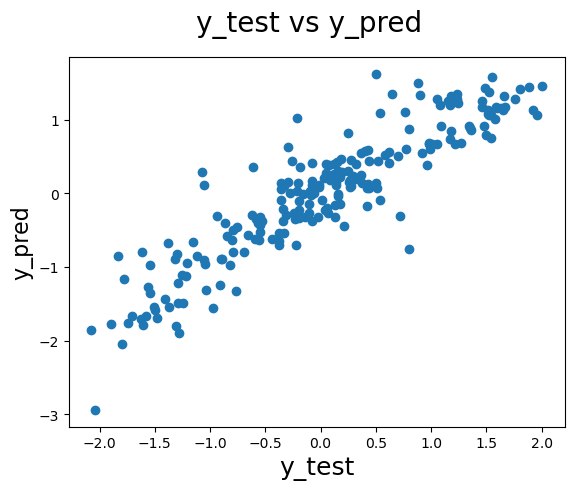

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Caculate R^2 on test data

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8230505251639098